In [88]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Image Load

In [89]:
image = cv2.imread("shapes-01.jpeg",cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # gray Image 로 변환
gaussian = cv2.GaussianBlur(gray,(0,0),1) # 가우시안 블러

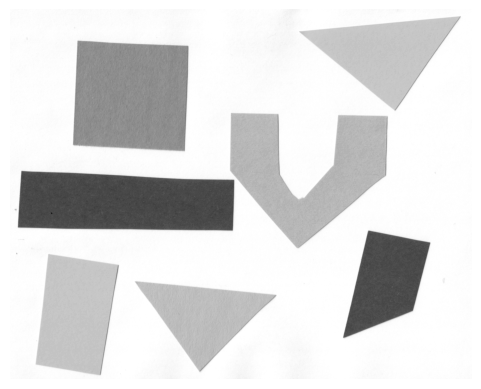

In [96]:
plt.imshow(gaussian, cmap="gray")
plt.axis('off')  # 축 제거
# plt.savefig("image-segmentation-4.png", bbox_inches='tight', pad_inches=0)  # save image

### Hisogram

Text(0, 0.5, 'Pixels Counts')

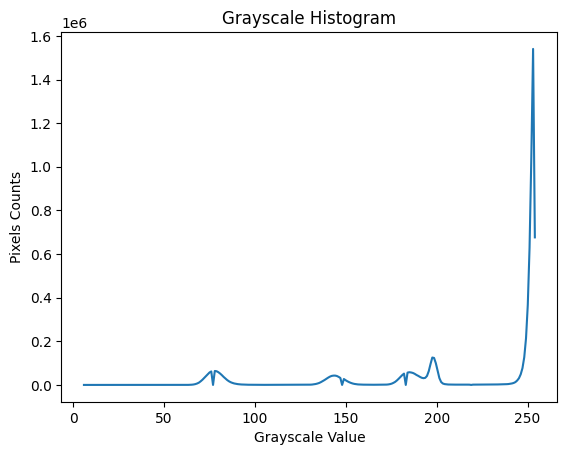

In [93]:
histogram, bin_edges = np.histogram(gaussian, bins=256)
# histogram, bin_edges = np.histogram(gaussian, bins=1000, range=(0.0, 1.0))

fig, ax = plt.subplots()
ax.plot(bin_edges[0:-1], histogram)
ax.set_title("Grayscale Histogram")
ax.set_xlabel("Grayscale Value")
ax.set_ylabel("Pixels Counts")

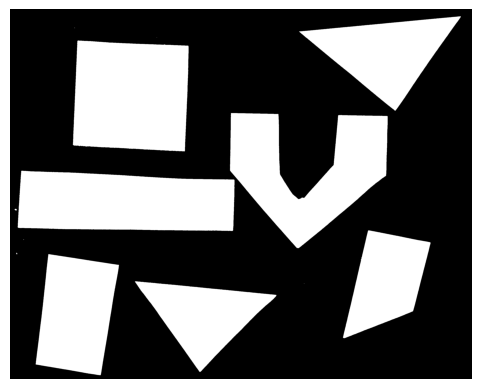

In [99]:
# create a mask based on the threshold
t = 225
binary_mask = gaussian < t

plt.imshow(binary_mask, cmap = 'gray')
plt.axis('off')
# plt.savefig("image-segmentation-5.png", bbox_inches='tight', pad_inches=0)  # save image